In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, xticks
%matplotlib inline

DATA_DIR = '.'

# Load Data

In [2]:
data = pd.DataFrame()

In [3]:
data = pd.concat([
     pd.read_csv('{}/final_prosa_yelp_mBERT_result_combined_1.csv'.format(DATA_DIR)),
     pd.read_csv('{}/final_prosa_yelp_mBERT_result_combined_2.csv'.format(DATA_DIR))
    ])
data = data.sort_values(by=['total_data', 'foreign_mult', 'seed'])
print(data.shape)
data.head(10)

(576, 8)


,type,total_data,seed,foreign_mult,total_foreign_data,f1,recall,precision
0,B,500,1,-1.0,500,0.414686,0.975962,0.520513
1,B,500,2,-1.0,500,0.335484,1.000000,0.504854
2,B,500,3,-1.0,500,0.414961,0.961538,0.518135
0,B,500,4,-1.0,500,0.444632,0.956731,0.526455
1,B,500,5,-1.0,500,0.414686,0.975962,0.520513
2,B,500,6,-1.0,500,0.339806,0.995192,0.504878
3,A,500,1,0.0,0,0.335484,1.000000,0.504854
4,A,500,2,0.0,0,0.335484,1.000000,0.504854
5,A,500,3,0.0,0,0.335484,1.000000,0.504854
3,A,500,4,0.0,0,0.335484,1.000000,0.504854


In [4]:
data = data.groupby(['total_data', 'foreign_mult']).mean().reset_index()

# Plot F1 By Total Data for each Type

In [5]:
data = data.sort_values(by=['total_data', 'foreign_mult'])
print(data.shape)
data.head(20)

(96, 7)


,total_data,foreign_mult,seed,total_foreign_data,f1,recall,precision
0,500,-1.00,3.5,500.0,0.394043,0.977564,0.515891
1,500,0.00,3.5,0.0,0.335484,1.000000,0.504854
2,500,0.25,3.5,125.0,0.335484,1.000000,0.504854
3,500,0.50,3.5,250.0,0.335484,1.000000,0.504854
4,500,0.75,3.5,375.0,0.335305,0.995192,0.503853
5,500,1.00,3.5,500.0,0.339790,0.995192,0.504879
6,500,1.50,3.5,750.0,0.351571,0.996795,0.507982
7,500,2.00,3.5,1000.0,0.388361,0.987179,0.515264
8,500,3.00,3.5,1500.0,0.390046,0.990385,0.516294
9,500,4.00,3.5,2000.0,0.401226,0.987179,0.519088


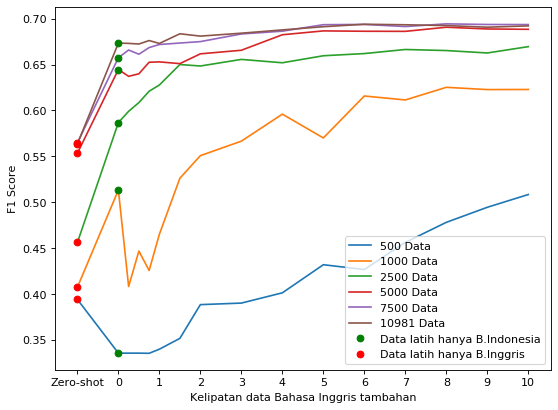

In [6]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

total_data = [500, 1000, 2500, 5000, 7500, 10981]

for x in total_data:
     plt.plot(data[(data['total_data'] == x )].foreign_mult.values,
        data[(data['total_data'] == x)].f1.values,
        
        label='{} Data'.format(x))
    
plt.plot(data[(data['foreign_mult'] == 0 )].foreign_mult.values,
data[(data['foreign_mult'] == 0)].f1.values,
'go',
label='Data latih hanya B.Indonesia'.format(x))

plt.plot(data[(data['foreign_mult'] == -1)].foreign_mult.values,
data[(data['foreign_mult'] == -1)].f1.values,
'ro',
label='Data latih hanya B.Inggris'.format(x))

xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Zero-shot', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend(loc="lower right")
plt.xlabel('Kelipatan data Bahasa Inggris tambahan')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot.png')
plt.show()

# Calculate difference A&B

In [7]:
total_data = [500, 1000, 2500, 5000, 7500, 10981]
diff = 0
for x in total_data:
    cur_diff = data[(data['total_data'] == x) & (data['foreign_mult'] == 0)].f1.values[0] - data[(data['total_data'] == x) & (data['foreign_mult'] == -1)].f1.values[0]
    print("Data {} diff: {}".format(x, cur_diff))
    diff += cur_diff
    
print(diff)
print("Avg: ", diff/len(total_data))

Data 500 diff: -0.05855873015411439
Data 1000 diff: 0.1060095636356812
Data 2500 diff: 0.13071265056159714
Data 5000 diff: 0.09125785342303883
Data 7500 diff: 0.0927664808921268
Data 10981 diff: 0.10995459535058649
0.4721424137089161
Avg:  0.07869040228481934


# Calculate highest gain

In [12]:
total_data = [500, 1000, 2500, 5000, 7500, 10981]
gains = 0
gains_list = []
for x in total_data:
    cur_gains = max(data[(data['total_data'] == x)].f1.values) - data[(data['total_data'] == x) & (data['foreign_mult'] == 0)].f1.values[0]
    gains += cur_gains
    print("Data {} diff: {}".format(x, cur_gains))
    gains_list.append(cur_gains)
    
print(gains)
print("Avg: ", gains/len(total_data))

Data 500 diff: 0.1728943185149034
Data 1000 diff: 0.11193071737149163
Data 2500 diff: 0.08278291746194233
Data 5000 diff: 0.04609309869696088
Data 7500 diff: 0.036935865692835135
Data 10981 diff: 0.020514832306416708
0.47115175004455007
Avg:  0.07852529167409168


In [13]:
total_data[5] = 10000
df_gains = pd.DataFrame()
df_gains['data'] = total_data
df_gains['gain'] = gains_list
df_gains.to_csv('gains.csv', index=False)
df_gains.head(10)

,data,gain
0,500,0.172894
1,1000,0.111931
2,2500,0.082783
3,5000,0.046093
4,7500,0.036936
5,10000,0.020515


In [14]:
max(data.f1.values)

0.6944237790793263

In [15]:
data[(data['total_data'] == 10981)]

,total_data,foreign_mult,seed,total_foreign_data,f1,recall,precision
80,10981,-1.00,3.5,10981.0,0.563520,0.904647,0.568557
81,10981,0.00,3.5,0.0,0.673475,0.590545,0.717390
82,10981,0.25,3.5,2745.0,0.673123,0.619391,0.700375
83,10981,0.50,3.5,5490.0,0.672441,0.637821,0.690526
84,10981,0.75,3.5,8235.0,0.676221,0.649038,0.691203
85,10981,1.00,3.5,10981.0,0.673067,0.658654,0.682830
86,10981,1.50,3.5,16471.0,0.683597,0.685897,0.687076
87,10981,2.00,3.5,21962.0,0.681060,0.692308,0.681443
88,10981,3.00,3.5,32943.0,0.684233,0.732372,0.673234
89,10981,4.00,3.5,43924.0,0.687809,0.739583,0.675201
